# At the end of this lesson you will learn:

 - What LSTM networks are
 - Which are their main components
 - Which data problems they are afordable to solve

## What LSTM are

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture used in deep learning. It is designed to capture long-term dependencies and patterns in sequential data, making it especially useful for tasks involving **time series**, natural language processing, speech recognition, and other sequential data.

Unlike traditional RNNs, LSTM networks have a more complex structure that includes memory cells and multiple gates, allowing them to maintain and update long-term and short-term memory states.

https://www.analyticsvidhya.com/blog/2022/03/an-overview-on-long-short-term-memory-lstm/

https://www.youtube.com/watch?v=YCzL96nL7j0



## Components

1- **Cell**: Every unit of the LSTM network is known as a “cell”. Each cell is composed of 3 inputs and 2 outputs.

  INPUTS:
  - $x(t)$ input at timestamp $t$
  - $h(t-1)$ previous hidden state, short memory term
  - $c(t-1)$ previous cell state, long memory term

  OUTPUTS:
  - $h(t)$ updated hidden state, used for predicting the output
  - $c(t)$ current cell state

2- **Gates**: In an LSTM network, gates play curcial role controlling the flow of information through the cells and determining what information should be stored, discarded, or output at each time step. There are three main types of gates in an LSTM:

  - **Forget Gate** ($f_t$): The forget gate determines which parts of the cell state ($C_{t-1}$) should be discarded or forgotten, allowing the LSTM to remove information that is no longer needed.

    $$f_t = σ(W_{if} * x_t + b_{if} + W_{hf} * h_{t-1} + b_{hf})$$
                   

      
 - **Input Gate**($i_t$): The input gate decides which values from the input and the previous hidden state should be used to **update the cell state** ($C_t$). It controls the flow of new information into the cell state.

   $$i_t = σ(W_{ii} * x_t + b_{ii} + W_{hi} * h_{t-1} + b_{hi})$$
   $$C_t = f_t * C_{t-1} + i_t * tanh(W_{ic} * x_t + b_{ic} + W_{hc} * h_{t-1} + b_{hc})$$

- **Output Gate** ($o_t$): This gate updates and finalizes the next hidden state. Since the hidden state contains critical information about previous cell inputs, it decides for the last time which information it should carry for providing the output.

  $$o_t = σ(W_{io} * x_t + b_{io} + W_{ho} * h_{t-1} + b_{ho})$$
  $$h_t = o_t * tanh(C_t)$$



Where:

- $f_t$ is the forget gate's output (ranging from 0 to 1).
- $x_t$ is the current input.
- $h_{t-1}$ is the previous hidden state.
- $σ$ represents the sigmoid activation function.
- $W_{if}, W_{hf}, b_{if}$ and $b_{hf}$ are weights matrices.


<img src="https://www.researchgate.net/publication/357835042/figure/fig1/AS:1123578401554432@1644893374129/Structure-of-the-memory-unit-of-LSTM.png" alt="Second Image" style="width: 55%;"/>

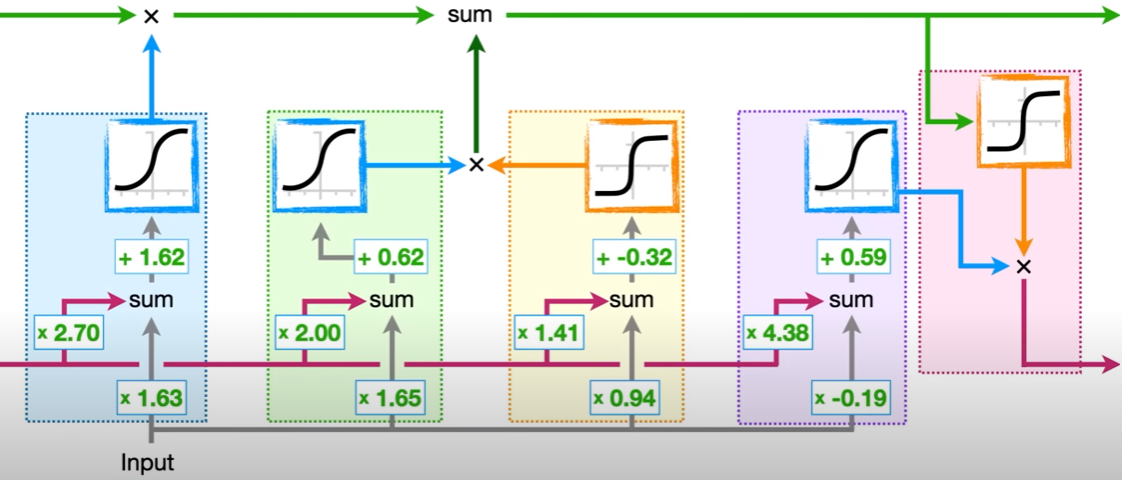

<img src="https://deeplearningmath.org/images/LSTM_gate_flow.png" alt="Second Image" style="width: 55%;"/>

## How a LSTM works

Structurally, this is how univariate LSTM training typically works:

   - We define a time_step (e.g., 10), which determines the input sequence length. Compared with a common Neural network, these 10 elements represent only one observation.

   - For each training sample, the LSTM takes a window of 10 consecutive observations as input, and the next observation (the 11th) as the validation target (what we want to predict). During the 10 observations the hidden and cell states are updated (not the weights).

   - In the next iteration, we slide the window one step forward — using observations 2 to 11 as input, and the 12th as the target.

   - This continues, creating overlapping sequences of inputs and targets.

   - This technique is often referred to as a sliding window or rolling window approach.

```
Input (X):  [T1, T2, ..., T10] → Output (y): T11

            [T2, T3, ..., T11] → Output (y): T12
            
            ...
            
            [T90, ..., T99]   → Output (y): T100

```
  - For the 11th value prediction the $h{_10}$ outputs (the outputs of the n-LSTM-neurons) are passed through the dense layer and returning the forecast. And so on for the 12th, 13th, 14th... predictions
  
  - As in the other NN, data is passed in batches. After having passed every instance of the batch the error is calculated and the weights are updated through backpropagation 

## Dense Layer

After all LSTM neuron it is added a dense NN.

An LSTM layer is excellent at learning temporal patterns in sequence data, but it doesn't directly produce the final output needed for most tasks (like classification or regression). That's where the dense (fully connected) layer comes in.

So, the dense layer takes information from each LSTM cell and transform it into the final prediction.

<img src="https://www.researchgate.net/publication/368914698/figure/fig3/AS:11431281123828070@1677816080703/Architecture-of-basic-LSTM-network-for-univariate-prediction.jpg" alt="Second Image" style="width: 55%;"/>


### How to determine the time_step size

It depends on various situations. 

1. Nature of the data: If the variable changes slowly, a longer window is usually better. If there are clear temporal patterns (daily, weekly, monthly), the window should align with those cycles

2. Amount of available data: With limited data (e.g., 100 days), using a large window (like 60) leaves fewer training examples. Practical rule: the longer the window, the more data you need to avoid overfitting.

3. Prediction goal: If you want to predict the next time step (e.g., tomorrow’s temperature), short windows (7 or 14) usually work. If you're predicting a longer-term trend (e.g., weekly average), use longer windows (30, 60, or more).




### Differences between time_step and batch size

**Time step** defines how many time steps the LSTM sees at once in each input sample. For example, if time_steps = 10, then **each sample is a sequence of 10** consecutive time points (e.g., 10 days of temperature).

**Batch size** is the number of sequences processed in parallel during training (or inference). It doesn’t affect how far back the LSTM looks, but how many samples it processes at the same time for efficiency.

After each batch the cost function is calculated, usually MSE. Then the weights of each cell are updated.

## Autocorrelation

Autocorrelation measures how much a time series is correlated with a lagged version of itself. It tells you how strongly today's value is related to past values (e.g., yesterday, 7 days ago, 30 days ago, etc.).

$$
\rho_k = \frac{\sum_{t=k+1}^{n} (x_t - \bar{x})(x_{t-k} - \bar{x})}
              {\sum_{t=1}^{n} (x_t - \bar{x})^2}
              $$

Autocorrelation values range between -1 and 1, not just 0 to 1.

    +1 means perfect positive correlation: values at that lag move exactly together.

    0 means no correlation at that lag.

    -1 means perfect negative correlation: values at that lag move exactly opposite.
    
    
It could be also used to choose a good window size (time_steps) for models like LSTM.

In time series forecasting (like predicting temperature, stock prices, etc.), autocorrelation is helpful because it means past values carry useful information about future values.

#### Autocorrelation plot

It represents the 

The blue shaded area represents the range within which autocorrelation values are not statistically significant — i.e., they could have occurred by random chance in a white noise signal.

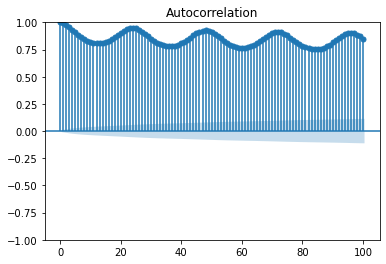

## Standardization

LSTMs are neural networks, and like most deep learning models, they train more effectively when the input data is well-scaled. 

Standardizing (zero mean, unit variance) avoids large gradients or vanishing gradients, which can otherwise destabilize training. Data normalization also helps in LSTM because they use `sigmoid` and `tanh` functions which can saturate and stop learning with large inputs.

If your input has multiple features (multivariate time series), and they are on different scales (e.g., temperature in °C and humidity percentage), then unstandardized inputs can lead to bias toward features with larger values.

### Examples of time series tasks

For regression: 
  - Predict temperature based on a sequence of passed temperatures.
  - Predict temperature based on a sequence of passed temperatures and other weather indicators such as humidity.
  - Predict temperature and humidity based on a sequence of multiple weather indicators

For classification: Predict whether a person will experience a heart event (0 or 1) based on a sequence of vital signs over time, such as heart rate, blood pressure, oxygen level.




## LSTM with several features (Multivariant)

For both classification or regression tasks. 

The only thing that changes is the $X_t$ vector. Instead of having only one element (temperature) and its weight, we have several elements (temperature and humidity) and their weights. Then they are multiplicated and added, also a bias is sum.

Next, as in univariate time series, this input is added to the to the previous cell state before entring in the activation function.

$$f_1 = \sigma(W_f \cdot z_1 + b_f) = \sigma(Weight_{cell state} \times cell state + Weight_{temperature} \times temperature + weight_{humidity} \times humidity + bias)$$

## Python exampe


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [41]:
weather = pd.read_csv('../../../Data/Deep Learning/Deep Learning/Barcelona_weather.csv', sep = ';')

weather['date'] = pd.to_datetime(weather['dt'],unit='s')
weather = weather[['date','temp','feels_like','pressure','humidity','wind_speed','dew_point', 'visibility','rain_1h']]
weather['rain_1h'] = weather['rain_1h'].fillna(0)
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather = weather[weather['year'].isin([2018,2019,2020,2021,2022])]

def nans(df):
  for c in df.columns:
    df[c] = df[c].bfill()
  return df

weather = nans(weather)

weather.drop_duplicates(inplace = True)
weather.reset_index(inplace = True)
weather.drop(['index'], axis = 1, inplace = True);
weather.head(3)


,date,temp,feels_like,pressure,humidity,wind_speed,dew_point,visibility,rain_1h,year,month
0,2018-01-01 00:00:00,14.63,13.61,1018,56,9.3,5.96,10000.0,0.0,2018,1
1,2018-01-01 01:00:00,13.31,12.05,1019,52,6.7,3.67,10000.0,0.0,2018,1
2,2018-01-01 02:00:00,12.35,11.10,1020,56,6.7,3.83,10000.0,0.0,2018,1


## Descriptive analysis

<Figure size 864x504 with 0 Axes>

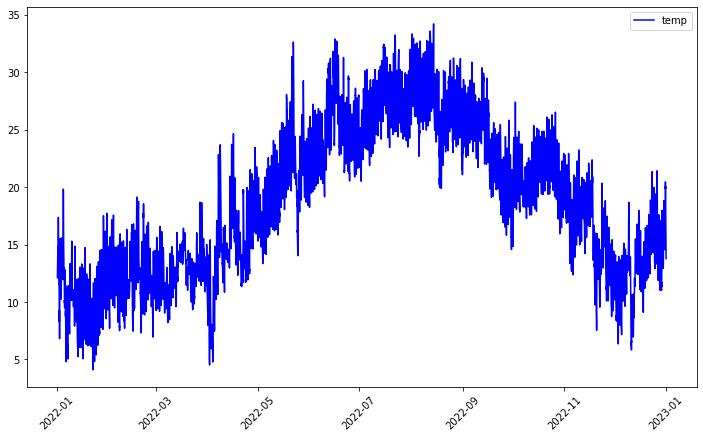

In [43]:
plt.figure(figsize=(12, 7))
fig, ax = plt.subplots(figsize=(12, 7))
# ax2 = ax.twinx()

ax.plot(weather['date'][-365*24:], weather['temp'][-365*24:], color = 'blue', label = 'temp')
plt.legend()
plt.xticks(rotation=45);

<Figure size 864x504 with 0 Axes>

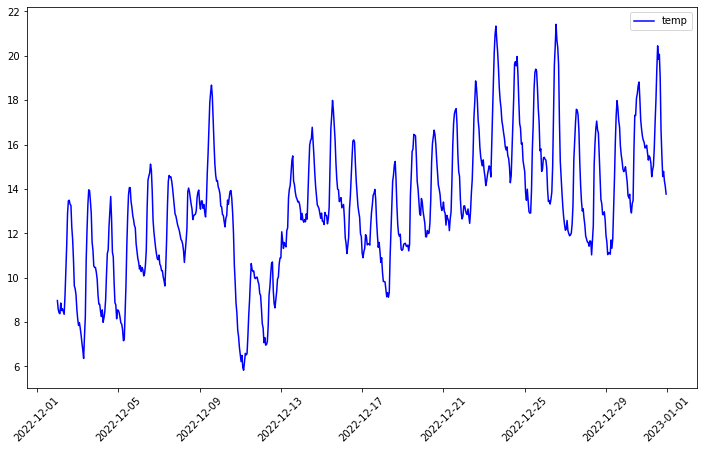

In [45]:
plt.figure(figsize=(12, 7))
fig, ax = plt.subplots(figsize=(12, 7))
# ax2 = ax.twinx()

ax.plot(weather['date'][-30*24:], weather['temp'][-30*24:], color = 'blue', label = 'temp')
plt.legend()
plt.xticks(rotation=45);

## Autocorrelation analysis

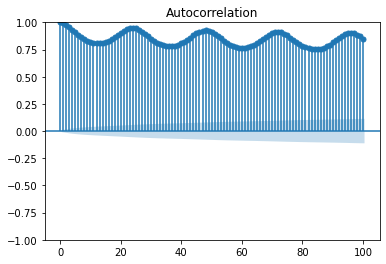

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

series = pd.Series(weather['temp'])

# Plot autocorrelation for lags 1 to 20
plot_acf(series, lags=100)
plt.show()


In [36]:
def autocorr_series(x, max_lag):
    
    x = np.array(x)
    autocorr_dict = {}

    for lag in range(1, max_lag + 1):
        if lag < len(x):
            corr = np.corrcoef(x[:-lag], x[lag:])[0, 1]
            autocorr_dict[lag] = round(corr, 3)
        else:
            autocorr_dict[lag] = np.nan  # Not enough data

    return autocorr_dict


In [39]:
autocorr_series(series, 50)

{1: 0.991,
 2: 0.977,
 3: 0.956,
 4: 0.933,
 5: 0.908,
 6: 0.885,
 7: 0.863,
 8: 0.844,
 9: 0.828,
 10: 0.817,
 11: 0.809,
 12: 0.806,
 13: 0.806,
 14: 0.811,
 15: 0.819,
 16: 0.831,
 17: 0.847,
 18: 0.865,
 19: 0.884,
 20: 0.904,
 21: 0.923,
 22: 0.939,
 23: 0.949,
 24: 0.952,
 25: 0.946,
 26: 0.933,
 27: 0.915,
 28: 0.894,
 29: 0.872,
 30: 0.851,
 31: 0.83,
 32: 0.813,
 33: 0.799,
 34: 0.788,
 35: 0.782,
 36: 0.779,
 37: 0.78,
 38: 0.785,
 39: 0.794,
 40: 0.807,
 41: 0.822,
 42: 0.841,
 43: 0.86,
 44: 0.88,
 45: 0.898,
 46: 0.914,
 47: 0.924,
 48: 0.928,
 49: 0.923,
 50: 0.911}

In [42]:
weather.columns

Index(['date', 'temp', 'feels_like', 'pressure', 'humidity', 'wind_speed',
       'dew_point', 'visibility', 'rain_1h', 'year', 'month'],
      dtype='object')

In [43]:
weather.year.value_counts()

2020    8784
2018    8760
2019    8760
2021    8760
2022    8760
Name: year, dtype: int64

In [76]:
# using every time lag from 2018 to 2020 to train the network
# X_train = weather[['temp', 'visibility','dew_point', 'pressure','humidity', 'wind_speed', 'feels_like']][:-8760]
X_train = weather[['temp','humidity']][:-8760]
y_train = weather[['temp']][:-8760]


# using 2022 to validate
# X_test = weather[['temp', 'visibility','dew_point', 'pressure','humidity', 'wind_speed', 'feels_like']][8760:]
X_test = weather[['temp', 'humidity']][8760:]
y_test = weather[['temp']][8760:]

temp_train = weather[['temp']][:-8760]
temp_test = weather[['temp']][8760:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(temp_train.shape, temp_test.shape)

(35064, 2) (35064, 1)
(35064, 2) (35064, 1)
(35064, 1) (35064, 1)


In [77]:
scaler = StandardScaler()
sc = scaler.fit(X_train)

train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(train_sc)
X_train_sc.columns = X_train.columns

test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(test_sc)
X_test_sc.columns = X_test.columns

print(X_train_sc.shape, y_train.shape)
print(X_test_sc.shape, y_test.shape)

(35064, 2) (35064, 1)
(35064, 2) (35064, 1)


In [64]:
scaler = StandardScaler()
sc = scaler.fit(temp_train)

temp_train_sc = sc.transform(temp_train)
temp_train_sc = pd.DataFrame(temp_train_sc)
temp_train_sc.columns = temp_train.columns

temp_test_sc = sc.transform(temp_test)
temp_test_sc = pd.DataFrame(temp_test_sc)
temp_test_sc.columns = temp_test.columns

print(temp_train_sc.shape, y_train.shape)
print(temp_test_sc.shape, y_test.shape)

(35064, 1) (35064, 1)
(35064, 1) (35064, 1)


In [65]:
# Esta función agrupa los instantes de tiempo en bloques de tamaño `time_steps`
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
      v = X.iloc[i:(i + time_steps)].values
      Xs.append(v)
      ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [78]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train_shape, y_train_shape = create_dataset(X_train_sc, y_train, time_steps)
X_test_shape, y_test_shape = create_dataset(X_test_sc, y_test, time_steps)

X_temp_train_shape, y_temp_train_shape = create_dataset(temp_train, y_train, time_steps)
X_temp_test_shape, y_temp_test_shape = create_dataset(temp_test, y_test, time_steps)

print(X_train_shape.shape, y_train.shape)
print(X_test_shape.shape, y_test.shape)

print(X_temp_train_shape.shape, y_temp_train_shape.shape)
print(X_temp_test_shape.shape, y_temp_test_shape.shape)

(35040, 24, 2) (35064, 1)
(35040, 24, 2) (35064, 1)
(35040, 24, 1) (35040, 1)
(35040, 24, 1) (35040, 1)


In [ ]:
X_temp_train_shape[0:48]

## Using only temperature as predictive

In [69]:
lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(50, input_shape = (X_temp_train_shape.shape[1], X_temp_train_shape.shape[2])),
    
    tf.keras.layers.Dense(units=1)
  ])
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])
history = lstm_model.fit(X_temp_train_shape, y_train_shape, validation_split = 0.2, epochs=50, batch_size = 1000)

ypred_shape = lstm_model.predict(X_temp_test_shape)

_, mae_tr, mape_tr = lstm_model.evaluate(X_temp_train_shape, y_train_shape)
_, mae_ts, mape_ts = lstm_model.evaluate(X_temp_test_shape, y_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/50
29/29 [==============================] - 9s 159ms/step - loss: 311.3309 - mean_absolute_error: 16.3658 - mean_absolute_percentage_error: 92.8913 - val_loss: 307.8902 - val_mean_absolute_error: 16.4713 - val_mean_absolute_percentage_error: 85.5232
Epoch 2/50
29/29 [==============================] - 3s 121ms/step - loss: 232.4852 - mean_absolute_error: 13.7216 - mean_absolute_percentage_error: 74.9018 - val_loss: 229.1238 - val_mean_absolute_error: 13.8598 - val_mean_absolute_percentage_error: 69.8620
Epoch 3/50
29/29 [==============================] - 3s 117ms/step - loss: 163.4072 - mean_absolute_error: 10.9944 - mean_absolute_percentage_error: 57.8292 - val_loss: 151.4564 - val_mean_absolute_error: 10.7686 - val_mean_absolute_percentage_error: 51.9521
Epoch 4/50
29/29 [==============================] - 4s 126ms/step - loss: 100.7104 - mean_absolute_error: 8.0959 - mean_absolute_percentage_error: 41.5312 - val_loss: 92.3514 - val_mean_absolute_error: 7.9799 - val_mean_absolu

29/29 [==============================] - 3s 112ms/step - loss: 1.4419 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 4.4401 - val_loss: 1.0153 - val_mean_absolute_error: 0.6089 - val_mean_absolute_percentage_error: 3.0125
Epoch 34/50
29/29 [==============================] - 3s 117ms/step - loss: 1.3669 - mean_absolute_error: 0.7293 - mean_absolute_percentage_error: 4.3376 - val_loss: 0.9313 - val_mean_absolute_error: 0.5891 - val_mean_absolute_percentage_error: 2.9395
Epoch 35/50
29/29 [==============================] - 3s 117ms/step - loss: 1.2931 - mean_absolute_error: 0.7138 - mean_absolute_percentage_error: 4.2898 - val_loss: 0.8741 - val_mean_absolute_error: 0.5788 - val_mean_absolute_percentage_error: 2.9301
Epoch 36/50
29/29 [==============================] - 3s 112ms/step - loss: 1.2338 - mean_absolute_error: 0.7011 - mean_absolute_percentage_error: 4.2440 - val_loss: 0.8235 - val_mean_absolute_error: 0.5677 - val_mean_absolute_percentage_error: 2.9199
Epoch 37

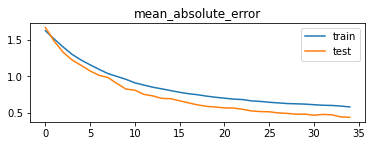

In [70]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history.history['mean_absolute_error'][15:], label='train')
plt.plot(history.history['val_mean_absolute_error'][15:], label='test')
plt.legend()

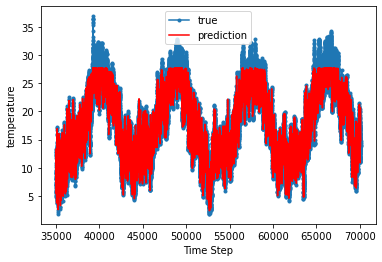

In [71]:
# plt.plot(np.arange(0, len(y_train_shape)), y_train_shape.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train_shape), len(y_train_shape) + len(y_test_shape)), y_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train_shape), len(y_train_shape) + len(y_test_shape)), ypred_shape.flatten(), 'r', label="prediction")
plt.ylabel('temperature')
plt.xlabel('Time Step')
plt.legend()
plt.show();

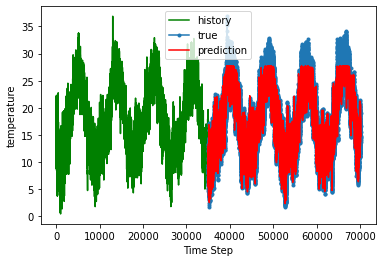

In [72]:
plt.plot(np.arange(0, len(y_temp_train_shape)), y_temp_train_shape.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_temp_train_shape), len(y_temp_train_shape) + len(y_temp_test_shape)), y_temp_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_temp_train_shape), len(y_temp_train_shape) + len(y_temp_test_shape)), ypred_shape.flatten(), 'r', label="prediction")
plt.ylabel('temperature')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Using multivariate

In [79]:
lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(50, input_shape = (X_train_shape.shape[1], X_train_shape.shape[2])),
    
    tf.keras.layers.Dense(units=1)
  ])
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])
history = lstm_model.fit(X_train_shape, y_train_shape, validation_data = (X_test_shape, y_test_shape), epochs=50, batch_size = 1000)

ypred_shape = lstm_model.predict(X_test_shape)

_, mae_tr, mape_tr = lstm_model.evaluate(X_train_shape, y_train_shape)
_, mae_ts, mape_ts = lstm_model.evaluate(X_test_shape, y_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/50
36/36 [==============================] - 10s 173ms/step - loss: 295.4870 - mean_absolute_error: 16.2657 - mean_absolute_percentage_error: 93.9125 - val_loss: 183.9097 - val_mean_absolute_error: 12.3949 - val_mean_absolute_percentage_error: 68.5213
Epoch 2/50
36/36 [==============================] - 5s 136ms/step - loss: 110.3629 - mean_absolute_error: 8.7111 - mean_absolute_percentage_error: 45.4789 - val_loss: 75.4025 - val_mean_absolute_error: 6.8940 - val_mean_absolute_percentage_error: 35.3614
Epoch 3/50
36/36 [==============================] - 5s 134ms/step - loss: 59.6249 - mean_absolute_error: 6.1456 - mean_absolute_percentage_error: 34.7791 - val_loss: 53.8303 - val_mean_absolute_error: 5.8641 - val_mean_absolute_percentage_error: 33.2420
Epoch 4/50
36/36 [==============================] - 6s 171ms/step - loss: 47.1031 - mean_absolute_error: 5.5622 - mean_absolute_percentage_error: 34.7332 - val_loss: 46.0381 - val_mean_absolute_error: 5.5538 - val_mean_absolute_perc

36/36 [==============================] - 3s 94ms/step - loss: 1.2833 - mean_absolute_error: 0.8357 - mean_absolute_percentage_error: 5.5573 - val_loss: 1.2794 - val_mean_absolute_error: 0.8295 - val_mean_absolute_percentage_error: 5.2026
Epoch 34/50
36/36 [==============================] - 3s 94ms/step - loss: 1.2341 - mean_absolute_error: 0.8197 - mean_absolute_percentage_error: 5.4615 - val_loss: 1.2210 - val_mean_absolute_error: 0.8093 - val_mean_absolute_percentage_error: 5.0662
Epoch 35/50
36/36 [==============================] - 3s 94ms/step - loss: 1.1861 - mean_absolute_error: 0.8023 - mean_absolute_percentage_error: 5.3604 - val_loss: 1.1983 - val_mean_absolute_error: 0.8119 - val_mean_absolute_percentage_error: 5.1655
Epoch 36/50
36/36 [==============================] - 3s 93ms/step - loss: 1.1498 - mean_absolute_error: 0.7918 - mean_absolute_percentage_error: 5.2989 - val_loss: 1.0895 - val_mean_absolute_error: 0.7507 - val_mean_absolute_percentage_error: 4.6022
Epoch 37/50


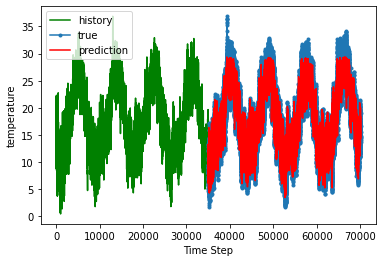

In [80]:
plt.plot(np.arange(0, len(y_temp_train_shape)), y_temp_train_shape.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_temp_train_shape), len(y_temp_train_shape) + len(y_temp_test_shape)), y_temp_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_temp_train_shape), len(y_temp_train_shape) + len(y_temp_test_shape)), ypred_shape.flatten(), 'r', label="prediction")
plt.ylabel('temperature')
plt.xlabel('Time Step')
plt.legend()
plt.show();